In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imread
from math import log

In [2]:
%matplotlib inline
sns.set_context("poster")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


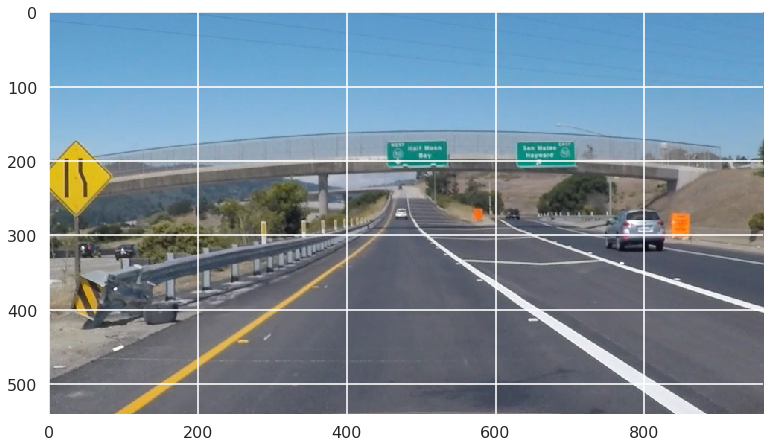

In [3]:
img = imread("../exit-ramp.jpg")
plt.imshow(img)

In [4]:
#bring in camera calibration matrix
with open('udacity_project_4_camera_calibration.pkl', 'rb') as f:
    calibration = pickle.load(f)
mtx = calibration["mtx"]
dist = calibration["dist"]

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [5]:
img = undistort(img)

In [6]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255, sobel_kernel=3):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
      
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


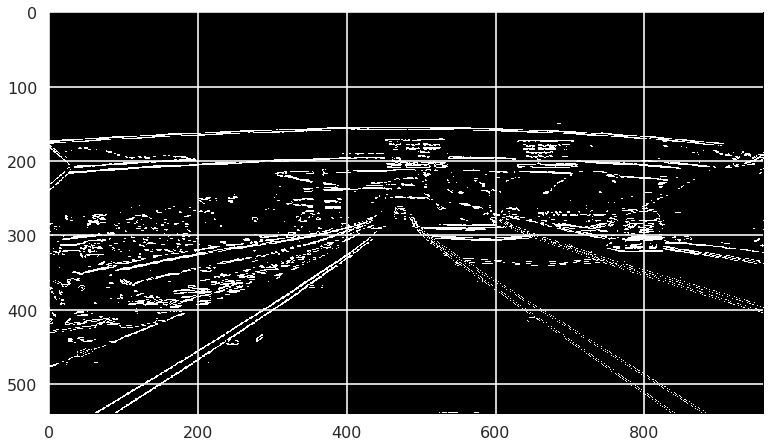

In [7]:
tmp = abs_sobel_thresh(img, 'y', 40,100)
plt.imshow(tmp, cmap="gray")

In [8]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude
    gradmag = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_gradmag = np.uint8(255 * gradmag / np.max(gradmag))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_gradmag)
    # 6) Return this mask as your binary_output image
    binary_output[(scaled_gradmag >= mag_thresh[0]) & (scaled_gradmag <= mag_thresh[1])] = 1
    return binary_output

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


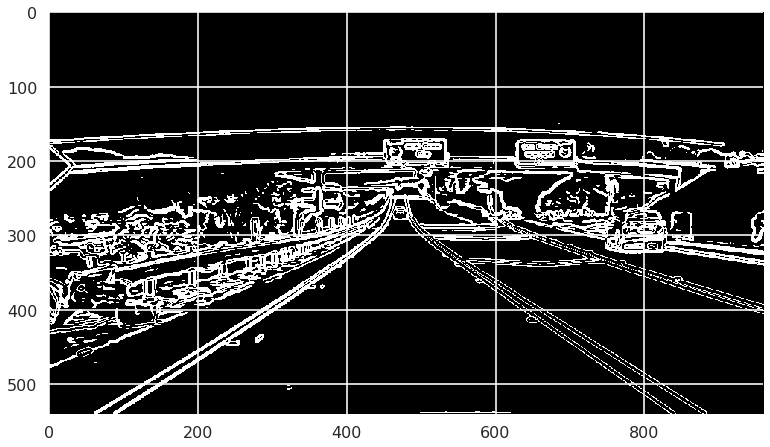

In [9]:
tmp = mag_thresh(img, 9, (30,100))
plt.imshow(tmp, cmap="gray")

In [10]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


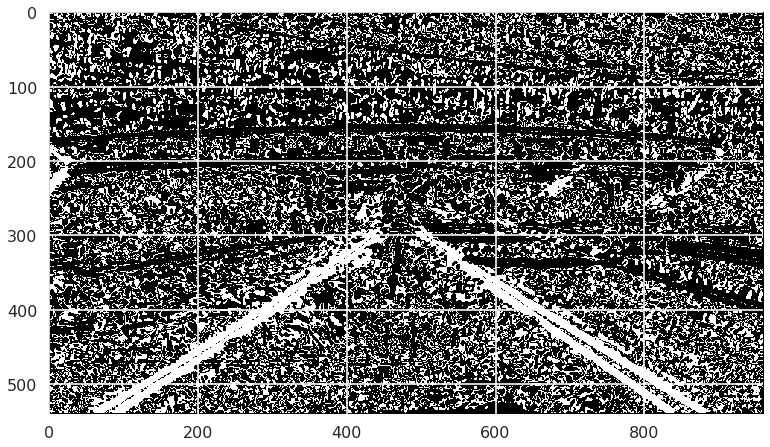

In [11]:
tmp = dir_threshold(img, 15, (.7,1.2))
plt.imshow(tmp, cmap="gray")

In [12]:
def color_threshold(img, h_thresh=(15, 100), s_thresh=(90, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    
    binary = np.zeros_like(S)
    binary[((S >= s_thresh[0]) & 
           (S <= s_thresh[1]))] = 1
    return binary


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


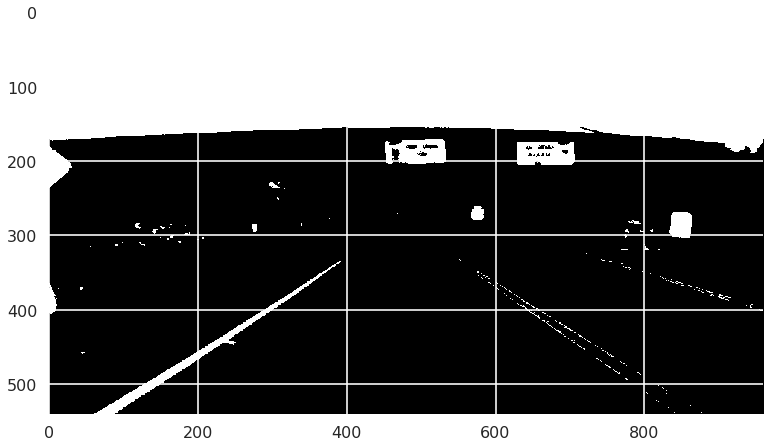

In [13]:
tmp=color_threshold(img)
plt.imshow(tmp, cmap="gray")

In [14]:
def hsv_threshold(img, v_thresh=(0,30)):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hsv[:,:,2]
    
    binary = np.zeros_like(S)
    binary[((S >= v_thresh[0]) & (S <= v_thresh[1]))] = 1
    return binary

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


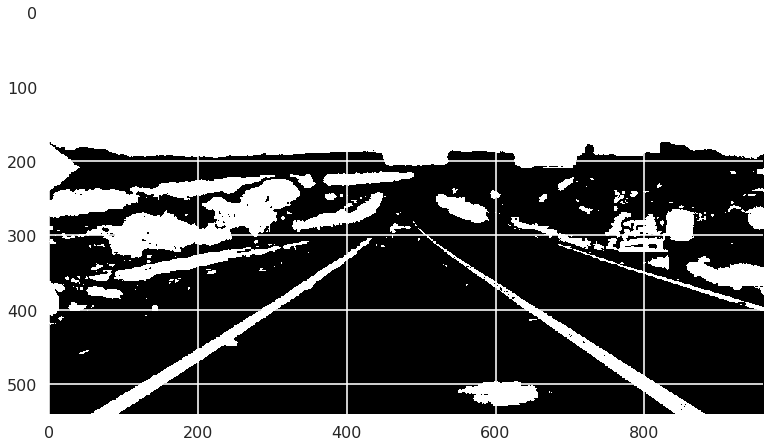

In [15]:
tmp = hsv_threshold(img, (0,30))
plt.imshow(tmp)

In [16]:
def find_lane_line(img):
    x_threshold = abs_sobel_thresh(img, 'x', 30, 120, 31)
    y_threshold = abs_sobel_thresh(img, 'y', 60, 180, 31)
    d_threshold = dir_threshold(img, 11, (.7,1.2))
    c_threshold = color_threshold(img)
    v_threshold = hsv_threshold(img)
    
    binary = np.zeros_like(x_threshold)
    binary[((x_threshold == 1) | (y_threshold == 1)) & (d_threshold == 1) & (v_threshold == 1)] = 1
    return binary

In [17]:
l_width = 825 - 200
t_width = 637 - 464
midpoint_x = 200 + l_width/2

In [18]:
midpoint_x - t_width/2

426.0

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


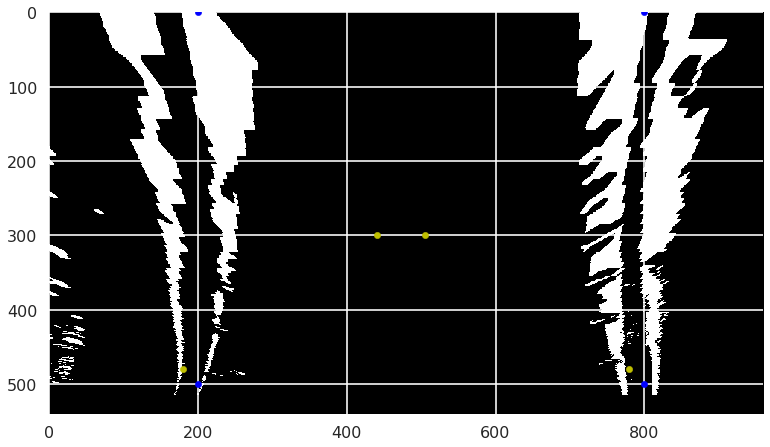

In [19]:
tmp = find_lane_line(img)
source_points = np.array([[440,300],[505,300],[180,480],[780,480]], dtype=np.float32)
dest_points = np.array([[200,0],[800,0],[200,500],[800,500]], dtype=np.float32)
plt.scatter(x=[x[0] for x in source_points], y=[x[1] for x in source_points], c='y', s=40)
plt.scatter(x=[x[0] for x in dest_points], y=[x[1] for x in dest_points], c='b', s=40)
M = cv2.getPerspectiveTransform(source_points, dest_points)
Minv = cv2.getPerspectiveTransform(dest_points, source_points)
img_size = (tmp.shape[1], tmp.shape[0])
warped = cv2.warpPerspective(tmp, M, img_size, flags=cv2.INTER_LINEAR )
plt.imshow(warped, cmap="gray")

In [20]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [21]:
warped.shape

(540, 960)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


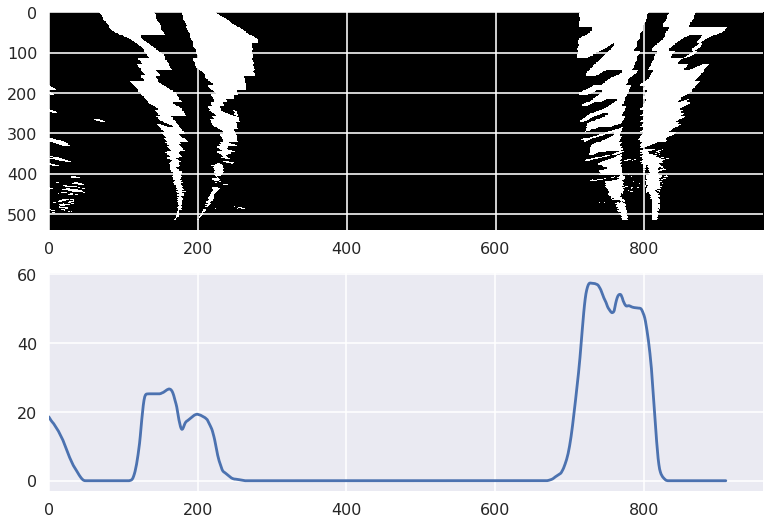

In [22]:
#take histogram of the lower third of the image
histogram = np.sum(warped[warped.shape[0]//3 * 2:,:], axis=0)
#smooth it out
histogram = moving_average(histogram, 50)

plt.subplot(2,1,1)
plt.imshow(warped, cmap="gray", aspect='auto')
plt.subplot(2,1,2)
plt.xlim((0,warped.shape[1]))
plt.plot(histogram)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


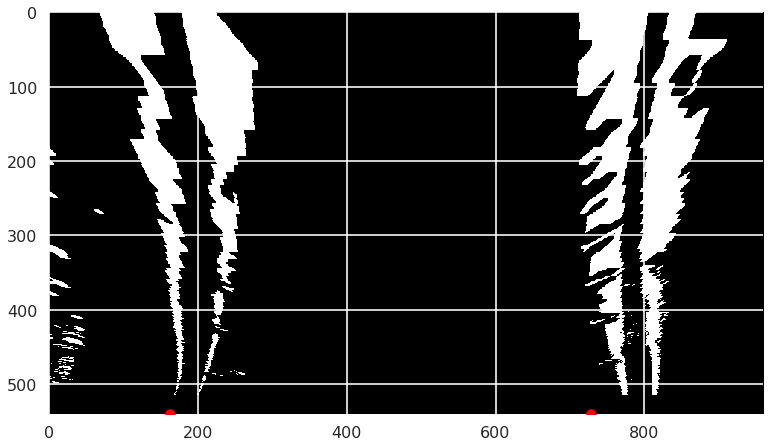

In [23]:

out_img = np.dstack((warped, warped, warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

max_y = out_img.shape[0]
plt.scatter(x=[leftx_base, rightx_base], y=[max_y,max_y], c='r', s=100)
plt.imshow(out_img)

In [24]:
# Set the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

In [25]:
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

In [26]:
# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = warped.shape[0] - (window + 1) * window_height
    win_y_high = warped.shape[0] - window * window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))


In [27]:
# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print('left fit', left_fit)
print('right fit', right_fit)

left fit [ -1.62640637e-04   6.34963228e-02   1.94406648e+02]
right fit [ -2.58890566e-04   1.06295291e-01   7.82860319e+02]


29672
39244


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


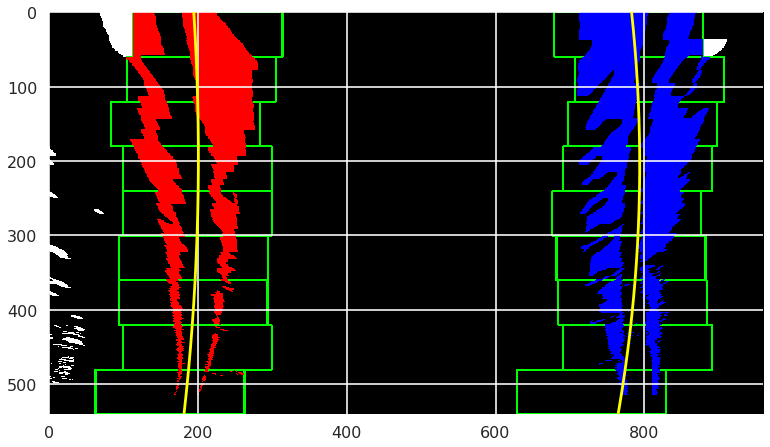

In [28]:
# Generate x and y values for plotting
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

print(len(nonzeroy[left_lane_inds]))
print(len(nonzeroy[right_lane_inds]))

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')





In [29]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

print(ym_per_pix, xm_per_pix)

y_eval = warped.shape[0]
print(y_eval)
# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(nonzeroy[left_lane_inds]*ym_per_pix, nonzerox[left_lane_inds]*xm_per_pix, 2)
right_fit_cr = np.polyfit(nonzeroy[right_lane_inds]*ym_per_pix, nonzerox[right_lane_inds]*xm_per_pix, 2)

print("Left world fit", left_fit_cr )
print("Right world fit", right_fit_cr )
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

0.041666666666666664 0.005285714285714286
540
Left world fit [ -4.95171037e-04   8.05496210e-03   1.02757799e+00]
Right world fit [ -7.88210821e-04   1.34843169e-02   4.13797597e+00]
1010.05873112 m 634.80802492 m


In [30]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

(720, 0)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


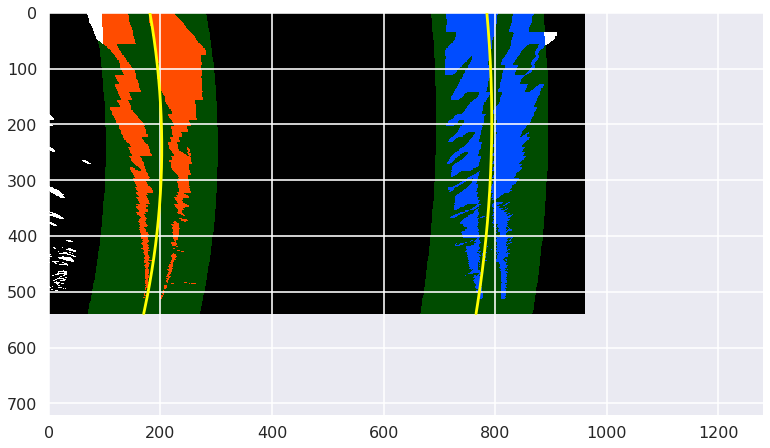

In [31]:
#Create an image to draw on and an image to show the selection window
out_img = np.dstack((warped, warped, warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [32]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

print(ym_per_pix, xm_per_pix)

y_eval = warped.shape[0]
print(y_eval)
# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(nonzeroy[left_lane_inds]*ym_per_pix, nonzerox[left_lane_inds]*xm_per_pix, 2)
right_fit_cr = np.polyfit(nonzeroy[right_lane_inds]*ym_per_pix, nonzerox[right_lane_inds]*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

0.041666666666666664 0.005285714285714286
540
450.558622631 m 697.821303196 m


In [33]:
#calc offset
left_base_x = left_fitx[-1]
right_base_x = right_fitx[-1]
detected_center_x = (right_base_x - left_base_x)/2 + left_base_x
actual_center_x = result.shape[1]/2
lane_offset_pixels =  detected_center_x - actual_center_x
world_offset_pixels = lane_offset_pixels * xm_per_pix
print("pixel offset from center of lane", round(lane_offset_pixels, 3), 'px')
print("world offset from center of lane", round(world_offset_pixels, 3), 'm', round(world_offset_pixels * 3.28084, 3), "ft")

pixel offset from center of lane -12.053 px
world offset from center of lane -0.064 m -0.209 ft


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


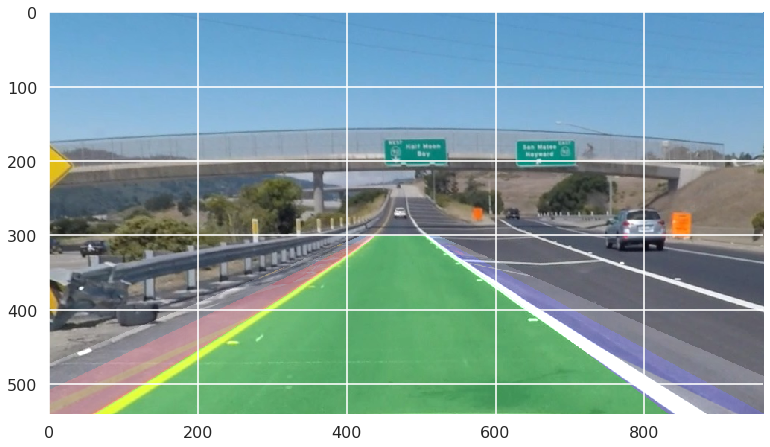

In [34]:
#make a nice output picture by mapping the lane back down
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([left_line_pts]), (255,0, 0))
cv2.fillPoly(color_warp, np.int_([right_line_pts]), (0,0, 255))
color_warp = cv2.addWeighted(img, 1, color_warp, 1, 1)


# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (warped.shape[1], warped.shape[0])) 
# Combine the result with the original image
final = cv2.addWeighted(img, 1, newwarp, 0.3, 0)




plt.imshow(final)

In [35]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self, xm_per_pixel=3.7/700, ym_per_pixel=30/720):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        
        # Define conversions in x and y from pixels space to meters
        self.xm_per_pix = xm_per_pixel # meters per pixel in x dimension
        self.ym_per_pix = ym_per_pixel # meters per pixel in y dimension
        
        
    def calc_curvature(self, y_point_used_to_calc_curvature):
        y_eval = y_point_used_to_calc_curvature
        
        # Fit new 2nd order polynomial to x,y in world space
        fit = np.polyfit(self.ally * self.ym_per_pix, self.allx * self.xm_per_pix, 2)
        
        # Calculate the new radii of curvature
        self.radius_of_curvature = ((1 + (2*fit[0]*y_eval*self.ym_per_pix + 
                           fit[1])**2)**1.5) / np.absolute(2*fit[0])
        
        #radius of curvature is in meters
        return self.radius_of_curvature
        
    def try_fit(self):
        # Fit a second order polynomial to each
        self.current_fit = np.polyfit(self.ally, self.allx, 2)
        return self.current_fit

    def predict_x(self, y):
        fit = self.current_fit
        return fit[0]*y**2 + fit[1]*y + fit[2]
        

In [36]:
class LanePositionDetector():
    def __init__(self, img_size, debug=True):
        self.left = None
        self.right = None
        self.current_offset = None
        self.curvature = None
        self.confidence = 0
        self.img_size = img_size # tuple(x, y)
        self.debug = debug
        self.debug_log = []
        
         #source points mapped from stright road in the center of the image 
        source_points = np.array([[440,300],[505,300],[180,480],[780,480]], dtype=np.float32)
        dest_points = np.array([[200,100],[800,100],[200,500],[800,500]], dtype=np.float32)

        #create transform matrices
        self.M = cv2.getPerspectiveTransform(source_points, dest_points)
        self.Minv = cv2.getPerspectiveTransform(dest_points, source_points)
        
    def color_threshold(self, img, h_thresh=(15, 100), s_thresh=(90, 255)):
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        S = hls[:,:,2]

        binary = np.zeros_like(S)
        binary[((S >= s_thresh[0]) & 
               (S <= s_thresh[1]))] = 1
        return binary
    
    def abs_sobel_thresh(sefl, img, orient='x', thresh_min=0, thresh_max=255, sobel_kernel=3):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        if orient == 'x':
            abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
        if orient == 'y':
            abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))

        # Scale to 8-bit (0 - 255) then convert to type = np.uint8
        scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
        
        # Create a mask of 1's where the scaled gradient magnitude 
        # is > thresh_min and < thresh_max
        binary_output = np.zeros_like(scaled_sobel)
        binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
        return binary_output
    
    def hsv_threshold(self, img, v_thresh=(0,30)):
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        S = hsv[:,:,2]

        binary = np.zeros_like(S)
        binary[((S >= v_thresh[0]) & (S <= v_thresh[1]))] = 1
        return binary
    
    def mag_thresh(self, img, sobel_kernel=3, mag_thresh=(0, 255)):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Take the gradient in x and y separately
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

        # Calculate the magnitude
        gradmag = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
        
        # Scale to 8-bit (0 - 255) and convert to type = np.uint8
        scaled_gradmag = np.uint8(255 * gradmag / np.max(gradmag))
        
        # Create a binary mask where mag thresholds are met
        binary_output = np.zeros_like(scaled_gradmag)
        
        # Return this mask as binary_output image
        binary_output[(scaled_gradmag >= mag_thresh[0]) & (scaled_gradmag <= mag_thresh[1])] = 1
        return binary_output
    
    def dir_threshold(self, img, sobel_kernel=3, thresh=(0, np.pi/2)):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Calculate the x and y gradients
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
        
        # Take the absolute value of the gradient direction, 
        # apply a threshold, and create a binary image result
        absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
        binary_output =  np.zeros_like(absgraddir)
        binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
        
        return binary_output
    
    def _moving_average(self, arr, n=3) :
        ret_value = np.cumsum(arr, dtype=float)
        ret_value[n:] = ret_value[n:] - ret_value[:-n]
        return ret_value[n - 1:] / n
        
    
    def get_perspective_image(self, img):
        #threshold imge
        x_threshold = self.abs_sobel_thresh(img, 'x', 30, 120, 31)
        y_threshold = self.abs_sobel_thresh(img, 'y', 60, 180, 31)
        d_threshold = self.dir_threshold(img, 11, (.7,1.2))
        c_threshold = self.color_threshold(img)
        v_threshold = self.hsv_threshold(img)

        #create binary image from thresholds
        binary = np.zeros_like(x_threshold)
        binary[((x_threshold == 1) | (y_threshold == 1)) & (d_threshold == 1) & (v_threshold == 1)] = 1

        #warp image to birdseye view
        warped = cv2.warpPerspective(binary, self.M, self.img_size, flags=cv2.INTER_LINEAR )
        
        return warped
    
    def historgram_search_lane_lines(self, birds_eye_img):
        #take histogram of the lower third of the image
        target_y = birds_eye_img.shape[0]//3 * 2
        histogram = np.sum(birds_eye_img[target_y:,:], axis=0)

        #smooth it out
        histogram = self._moving_average(histogram, 50)

        #split image in half, look for lane lines in each half
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        #look at the bottom of the image
        max_y = img.shape[0]
        
#         if self.debug:
#             plt.scatter(x=[leftx_base, rightx_base], y=[max_y,max_y], c='r', s=100)
       

        # Set the number of sliding windows
        nwindows = 9

        # Set height of windows
        window_height = np.int(birds_eye_img.shape[0]/nwindows)

        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = birds_eye_img.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base

        # Set the width of the windows +/- margin
        margin = 100

        # Set minimum number of pixels found to recenter window
        minpix = 50

        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        if self.debug:
            out_img = np.dstack((birds_eye_img, birds_eye_img, birds_eye_img))*255
            out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
            out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
            
        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = birds_eye_img.shape[0] - (window + 1) * window_height
            win_y_high = birds_eye_img.shape[0] - window * window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            
            if self.debug:
                # Draw the windows on the visualization image
                cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
                cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    
            

            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) 
                              & (nonzeroy < win_y_high) 
                              & (nonzerox >= win_xleft_low) 
                              & (nonzerox < win_xleft_high)).nonzero()[0]
            
            good_right_inds = ((nonzeroy >= win_y_low) 
                               & (nonzeroy < win_y_high) 
                               & (nonzerox >= win_xright_low) 
                               & (nonzerox < win_xright_high)).nonzero()[0]

            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)

            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)

        # Extract left and right line pixel positions
        left_line = Line()
        left_line.allx = nonzerox[left_lane_inds]
        left_line.ally = nonzeroy[left_lane_inds]

        right_line = Line()
        right_line.allx = nonzerox[right_lane_inds]
        right_line.ally = nonzeroy[right_lane_inds]



        # Fit a second order polynomial to each
        left_line.try_fit()
        right_line.try_fit()
        
        if self.debug:
            # Generate x and y values for plotting
            left_fit = left_line.current_fit
            right_fit = right_line.current_fit
            ploty = np.linspace(0, birds_eye_img.shape[0]-1, birds_eye_img.shape[0] )
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

            out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
            out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

            self.debug_log.append(("histogram fit", out_img, left_fitx, right_fitx))
            
 

        #look for curvature at the bottom of the image
        y_point_used_to_calc_curvature = birds_eye_img.shape[0]
        confidence = self.score_line_fit(y_point_used_to_calc_curvature, left_line, right_line)

        return confidence, left_line, right_line
    
    def confident_lane_search(self, birds_eye_img):
        nonzero = birds_eye_img.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        margin = 100
        
        #TODO: Use best fit
        left_fit = self.left.current_fit
        right_fit = self.right.current_fit
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + 
                                       left_fit[1]*nonzeroy + 
                                       left_fit[2] - margin)) & 
                          (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                                       left_fit[1]*nonzeroy + 
                                       left_fit[2] + margin))) 
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + 
                                        right_fit[1]*nonzeroy + 
                                        right_fit[2] - margin)) & 
                           (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                                        right_fit[1]*nonzeroy + 
                                        right_fit[2] + margin)))  

        # Extract left and right line pixel positions
        left_line = Line()
        left_line.allx = nonzerox[left_lane_inds]
        left_line.ally = nonzeroy[left_lane_inds]

        right_line = Line()
        right_line.allx = nonzerox[right_lane_inds]
        right_line.ally = nonzeroy[right_lane_inds]

        # Fit a second order polynomial to each
        left_line.try_fit()
        right_line.try_fit()
        
        y_point_used_to_calc_curvature = birds_eye_img.shape[0]
        confidence = self.score_line_fit(y_point_used_to_calc_curvature, left_line, right_line)

        return confidence, left_line, right_line
        
    
    def score_line_fit(self, y_point_used_to_calc_curvature, left_line, right_line, curvature_tolerance=.15, parallel_tolerance=.12):
        confidence = 1.0
        #compare curvature - should be similar in size and sign with a tolerate of T
        #when curvature is very large, lines could be in the oppsite direction
        log_left_curv = log(left_line.calc_curvature(y_point_used_to_calc_curvature))
        log_right_curv = log(right_line.calc_curvature(y_point_used_to_calc_curvature))
        c_tolerance = max(log_left_curv, log_right_curv) * curvature_tolerance
        c_delta = abs(log_left_curv - log_right_curv)
        if c_delta > c_tolerance:
            confidence -= (1 - c_tolerance/c_delta)
        else:
            #todo adds a more confidence as delta goes to zero
            confidence += .1
        
        #compare parallel -> predict distannce at n points horizontally, should be on average within k pixels
        top = 0
        mid = self.img_size[1]//2
        bottom = self.img_size[1]
        
        lane_widths = [abs(right_line.predict_x(pos) - left_line.predict_x(pos)) for pos in [top, mid, bottom]]
        max_width = max(lane_widths)
        min_width = min(lane_widths)
        width_tolerance = max_width * parallel_tolerance
        width_delta = abs(max_width - min_width)
        if width_delta > width_tolerance:
            confidence -= (1 - width_tolerance/width_delta)
        else:
            #todo adds a more confidence as delta goes to zero
            confidence += .1
            
        
        confidence = min(1, confidence)
        
        
        return confidence
    
    def draw_lane(self, birds_eye_img):
        #make a nice output picture by mapping the lane back down
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(birds_eye_img).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
        margin=10
        
        left_fit = self.left.current_fit
        right_fit = self.right.current_fit
        ploty = np.linspace(0, birds_eye_img.shape[0]-1, birds_eye_img.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([left_line_pts]), (255,0, 0))
        cv2.fillPoly(color_warp, np.int_([right_line_pts]), (0,0, 255))
        color_warp = cv2.addWeighted(img, 1, color_warp, 1, 1)


        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, self.Minv, (birds_eye_img.shape[1], birds_eye_img.shape[0])) 
        # Combine the result with the original image
        final = cv2.addWeighted(img, 1, newwarp, 0.3, 0)
        
        return final

    
    def update(self, frame):
        #get the birdseye view of the frame
        birds_eye = self.get_perspective_image(frame)
        if self.debug:
            self.debug_log.append(("birds eye", birds_eye))
            
        #if we dont currently have a good confidence score, we have to start the
        #search all over again
        if self.confidence < .2:
            confidence, left_line, right_line = self.historgram_search_lane_lines(birds_eye)
            self.confidence = confidence
            self.left = left_line
            self.right = right_line
        else:
            confidence, left_line, right_line = self.confident_lane_search(birds_eye)
            self.confidence = confidence
            self.left = left_line
            self.right = right_line
        
        #give back the warped image and the lines and confidence
        return birds_eye, self.confidence, self.left, self.right


In [37]:
lpd = LanePositionDetector((img.shape[1], img.shape[0]))

In [38]:
birds_eye_img, confidence, left_lane, right_lane = lpd.update(img)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


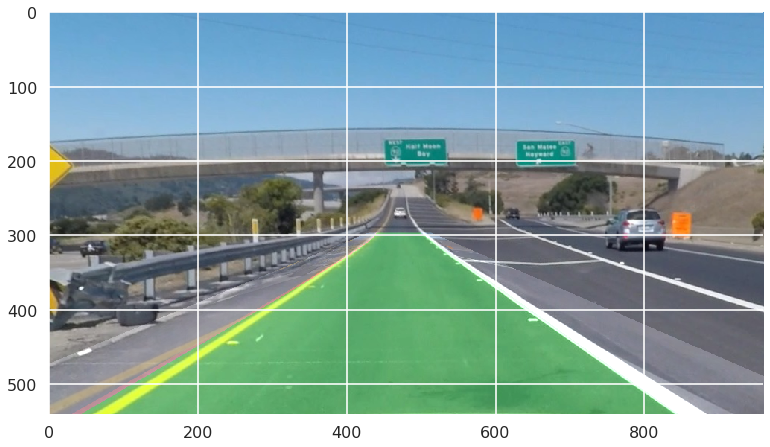

In [39]:
output_image = lpd.draw_lane(birds_eye_img)
plt.imshow(output_image)


In [40]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [44]:
lpd = LanePositionDetector((img.shape[1], img.shape[0]))
def pipeline(image):
    image = undistort(image)
    birds_eye_img, confidence, left_lane, right_lane = lpd.update(image)
    output_image = lpd.draw_lane(birds_eye_img)
    return output_image

In [47]:
project_output = 'project_output.mp4'
clip = VideoFileClip("project_video.mp4")
project_output_clip = clip.fl_image(pipeline) #NOTE: this function expects color images!!
%time project_output_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video project_output.mp4
[MoviePy] Writing video project_output.mp4



 12%|█▏        | 152/1261 [00:53<06:22,  2.90it/s]


 24%|██▍       | 303/1261 [01:43<05:53,  2.71it/s]


 36%|███▌      | 454/1261 [02:37<04:54,  2.74it/s]


 48%|████▊     | 605/1261 [03:28<04:26,  2.46it/s]


 60%|█████▉    | 756/1261 [04:47<02:56,  2.86it/s]


 72%|███████▏  | 907/1261 [05:47<02:00,  2.94it/s]


 84%|████████▍ | 1057/1261 [06:48<01:21,  2.51it/s]


 96%|█████████▌| 1205/1261 [07:50<00:23,  2.37it/s]


100%|█████████▉| 1260/1261 [08:12<00:00,  2.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output.mp4 

CPU times: user 21min 26s, sys: 30 s, total: 21min 56s
Wall time: 8min 12s


In [48]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))